In [1]:
from hmm_AR_k_Tstud import HMMStates, TruncatedNormalEmissionsAR_k
from env import *
import pickle
import tensorflow as tf
from ray.rllib.utils import check_env

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
2023-01-16 15:15:11.909655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-16 15:15:12.070534: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-16 15:15:12.070557: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-16 15:15:12.910554: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
file = '../../Fractal Values fitting with HMMs/trace_HMM_AR_k_Tstud.pickle'
with open(file, "rb") as fp:
    trace = pickle.load(fp)

In [3]:
reward_a_0 = - 0
reward_a_R2 = - 50
reward_a_A1 = - 2000 


reward_s_0 = - 100
reward_s_1 = - 200
reward_s_2 = - 1000
reward_s_3 = - 8000 #10000

rewards_3_4 = np.asarray([
    [reward_a_0 + reward_s_0, reward_a_0 + reward_s_1, reward_a_0 + reward_s_2, reward_a_0 + reward_s_3],
    [reward_a_R2 + reward_s_0, reward_a_R2 + reward_s_1, reward_a_R2 + reward_s_2, reward_a_R2 + reward_s_3],
    [1*reward_a_A1 + reward_a_R2 + reward_s_0, 1.33*reward_a_A1 + reward_a_R2 + reward_s_1, 1.66*reward_a_A1 + reward_a_R2 + reward_s_2, 2*reward_a_A1 + reward_a_R2 + reward_s_3]
])

rewards_3_4

array([[  -100.,   -200.,  -1000.,  -8000.],
       [  -150.,   -250.,  -1050.,  -8050.],
       [ -2150.,  -2910.,  -4370., -12050.]])

In [4]:
env = FractalEnv(trace=trace, reward_matrix=rewards_3_4, seed=0, domain_randomization=False)

In [5]:
check_env(env)

2023-01-16 15:16:00,137	WARNING env.py:147 -- Your env doesn't have a .spec.max_episode_steps attribute. This is fine if you have set 'horizon' in your config dictionary, or `soft_horizon`. However, if you haven't, 'horizon' will default to infinity, and your environment will not be reset.


In [5]:
obs = env.reset()
obs

array([-0.2429448])

In [6]:
import numpy as np
counts = np.array([0, 0, 0, 0])
for i in range(1000):
    obs = env.reset()
    counts[env.state] +=1
counts, counts/1000, trace['init_probs'].mean(0)

(array([307, 406, 190,  97]),
 array([0.307, 0.406, 0.19 , 0.097]),
 array([0.31492019, 0.40100431, 0.19309788, 0.09097762]))

In [7]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})

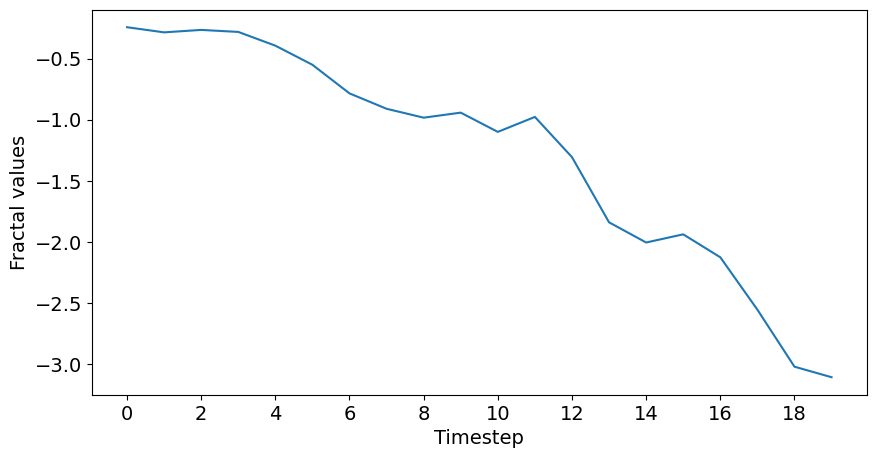

In [8]:
actions = {'Do-nothing': 0, 'Tamping': 1, 'Renewal': 2}
env = FractalEnv(trace=trace, reward_matrix=rewards_3_4, seed=0, domain_randomization=False)
obs = env.reset()
obs_list = []
lenght = 20
actions_list = []
states_list = []
for step in range(lenght):
    obs_list.append(obs)
    states_list.append(env.state)
    action = actions['Do-nothing']
    obs, reward, done, info = env.step(action)
    actions_list.append(action)
    
plt.figure(figsize=(10,5))
plt.plot(np.arange(20), np.asarray(obs_list))
plt.xticks(np.arange(0, 20, 2))
plt.ylabel('Fractal values')
plt.xlabel('Timestep');

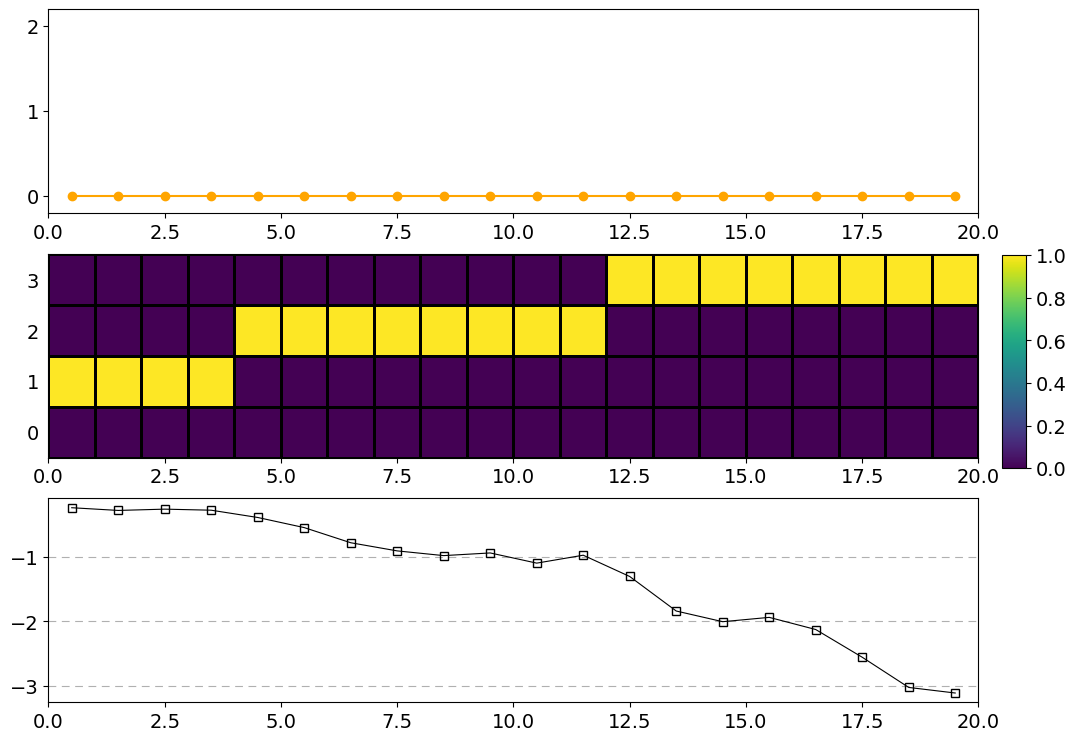

In [28]:
fig, ax = plt.subplots(3, 1, figsize=(12, 9), gridspec_kw={'width_ratios': [1]})
for i in range(3):
    ax[i].set_xlim(0, lenght)
ax[0].set_ylim(-0.2, 2.2)
ax[0].set_yticks([0, 1, 2])
#ax[3].set_ylim(-0.4, -0.)
#ax[3].set_yticks([-0., -0.1, -0.2, -0.3, -0.4])
ax[1].set_yticks([0.5, 1.5, 2.5, 3.5])
ax[1].set_yticklabels([0, 1, 2, 3])
ax[1].yaxis.set_ticks_position('none')
ax[0].plot(np.arange(0.5, lenght), actions_list, marker='o', color='orange')
c1 = ax[1].pcolormesh(tf.keras.utils.to_categorical(states_list, num_classes=4).T, edgecolors='k', linewidths=1, cmap='viridis')
ax[2].plot(np.arange(0.5, lenght), np.array(obs_list), marker='s', markerfacecolor='none', markeredgewidth=1, color='k', 
            markeredgecolor='k', linewidth=0.8)
ax[2].grid(axis='y', linestyle='dashed', dashes=(7, 5))

cb_ax = fig.add_axes([.92,.37,.02,.237])
fig.colorbar(c1, cax=cb_ax); #.92,.124,.02,.49

In [32]:
obs = env.reset()

obs_list = []
state_list = []
action_list = []
reward_list = []

lenght = 50

for _ in range(lenght):
    obs_list.append(obs)
    state_list.append(env.state)
    if obs < - 0.5 and obs > - 1.:
        action = 1
    elif obs < -1.:
        action = 2
    elif obs > -0.5:
        action = 0
    else:
        raise('Error')
    obs, reward, done, info = env.step(action)
    action_list.append(action)
    reward_list.append(reward)

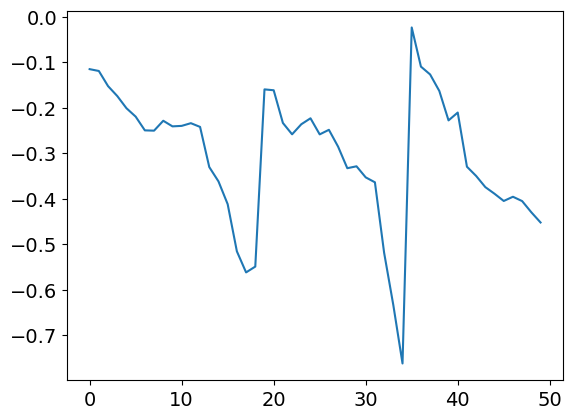

In [33]:
plt.plot(np.array(obs_list))

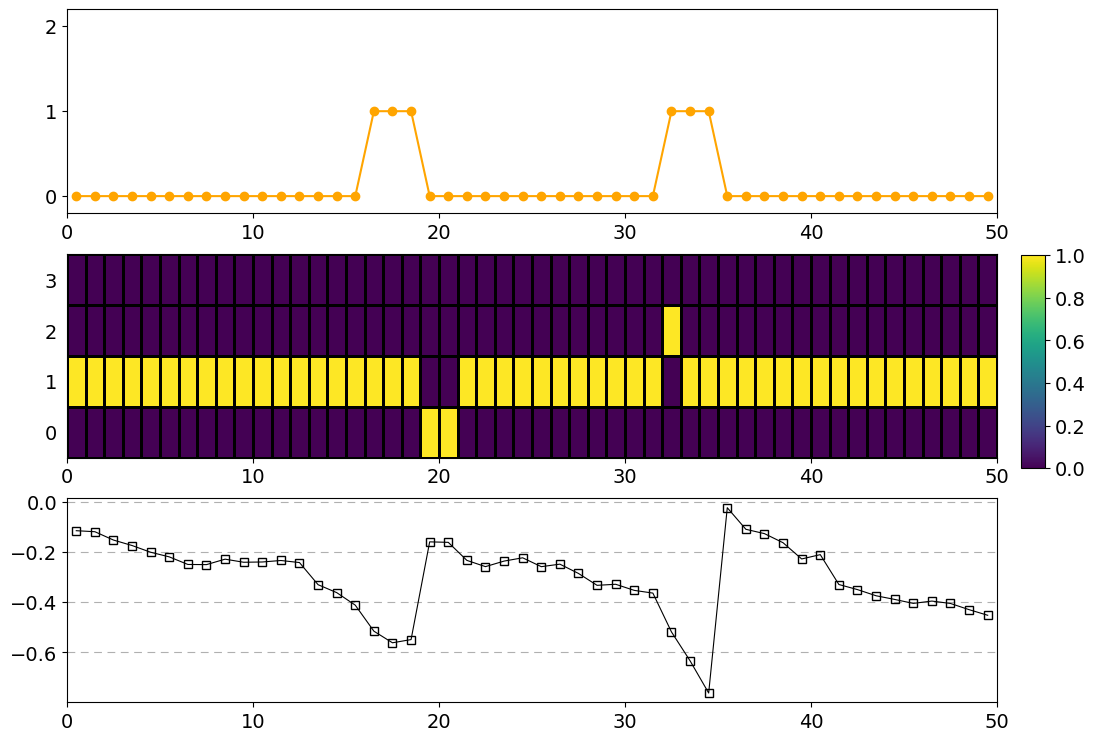

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(12, 9), gridspec_kw={'width_ratios': [1]})
for i in range(3):
    ax[i].set_xlim(0, lenght)
ax[0].set_ylim(-0.2, 2.2)
ax[0].set_yticks([0, 1, 2])
#ax[3].set_ylim(-0.4, -0.)
#ax[3].set_yticks([-0., -0.1, -0.2, -0.3, -0.4])
ax[1].set_yticks([0.5, 1.5, 2.5, 3.5])
ax[1].set_yticklabels([0, 1, 2, 3])
ax[1].yaxis.set_ticks_position('none')
ax[0].plot(np.arange(0.5, lenght), action_list, marker='o', color='orange')
c1 = ax[1].pcolormesh(tf.keras.utils.to_categorical(state_list, num_classes=4).T, edgecolors='k', linewidths=1, cmap='viridis')
ax[2].plot(np.arange(0.5, lenght), np.array(obs_list), marker='s', markerfacecolor='none', markeredgewidth=1, color='k', 
            markeredgecolor='k', linewidth=0.8)
ax[2].grid(axis='y', linestyle='dashed', dashes=(7, 5))

cb_ax = fig.add_axes([.92,.37,.02,.237])
fig.colorbar(c1, cax=cb_ax); #.92,.124,.02,.49